<a href="https://colab.research.google.com/github/davidsonn1/davidsonn1.github.io/blob/main/DOS/Problem3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Set 3

In [ ]:
import pandas as pd
import pyarrow

q1

In [ ]:

df_spot = pd.read_feather('https://raw.githubusercontent.com/ncrowder/datacamp/main/sampling_in_python/spotify_2000_2020.feather')

# 1. Generate a samp20 dataframe from a random sample of 20 rows
samp20 = df_spot.sample(n=20)
print(samp20)

       acousticness                                            artists  \
25105      0.040400                                ['Matchbox Twenty']   
26469      0.007010                                  ['WALK THE MOON']   
4176       0.697000                                   ['Arijit Singh']   
12186      0.243000                                       ['Ella Mai']   
26546      0.306000                               ['Sturgill Simpson']   
13910      0.297000                                    ['The Wiggles']   
30922      0.041000                                  ['Murphy Elmore']   
11992      0.000553                           ['Florida Georgia Line']   
22097      0.099100                                ['Flo Rida', 'Sia']   
16177      0.010500  ['Tech N9ne', 'Lil Wayne', 'Yo Gotti', 'Big Sc...   
25229      0.134000                                       ['Elefante']   
18083      0.108000                                     ['Dan + Shay']   
24503      0.087300                   

Q2

In [ ]:
samp2per = df_spot.sample(frac=0.02)
print(samp2per)

       acousticness                                            artists  \
26480      0.279000                  ['Rittz', 'Mike Posner', 'B.o.B']   
12502      0.000467                               ['IDK', 'A$AP Ferg']   
34098      0.175000                                ['Waylon Jennings']   
8286       0.169000                                  ['Summer Walker']   
21749      0.016200                            ['Theory of a Deadman']   
...             ...                                                ...   
37918      0.067700                              ['Belle & Sebastian']   
6286       0.091600                                  ['Chloe x Halle']   
41256      0.551000  ['Bad Bunny', 'Mambo Kingz', 'DJ Luian', 'Arca...   
38801      0.004390                                         ['ODESZA']   
38116      0.126000                                 ['Ray LaMontagne']   

       danceability  duration_ms  duration_minutes  energy  explicit  \
26480         0.723     298200.0       

Q3

In [ ]:
# 3. Generate a random sample of 1% of the 'duration_ms' column
samp1per_duration = df_spot['duration_ms'].sample(frac=0.01)

# Compute the mean of the sample
mean_sample = samp1per_duration.mean()

# Compute the mean of the full dataset
mean_full = df_spot['duration_ms'].mean()

# Calculate the difference in milliseconds
difference_ms = mean_sample - mean_full

# Calculate the percentage error
percentage_error = (difference_ms / mean_full) * 100

print(f"Sample mean: {mean_sample:.2f} ms")
print(f"Full dataset mean: {mean_full:.2f} ms")
print(f"Difference: {difference_ms:.2f} ms")
print(f"Percentage error: {percentage_error:.2f}%")

Sample mean: 224580.02 ms
Full dataset mean: 231129.11 ms
Difference: -6549.09 ms
Percentage error: -2.83%


Q4

In [ ]:
# 4. Sort the dataframe by 'duration_ms' and find mean 'energy' of top 50 rows
df_sorted = df_spot.sort_values('duration_ms', ascending=False)

# Get the mean 'energy' of the top 50 rows
mean_energy_top50 = df_sorted.head(50)['energy'].mean()

# Get the mean 'energy' of the full dataset
mean_energy_full = df_spot['energy'].mean()

# Calculate the difference
difference_energy = mean_energy_top50 - mean_energy_full

print(f"Mean energy (top 50 longest songs): {mean_energy_top50:.4f}")
print(f"Mean energy (full dataset): {mean_energy_full:.4f}")
print(f"Difference: {difference_energy:.4f}")

Mean energy (top 50 longest songs): 0.3749
Mean energy (full dataset): 0.6443
Difference: -0.2694


Q5

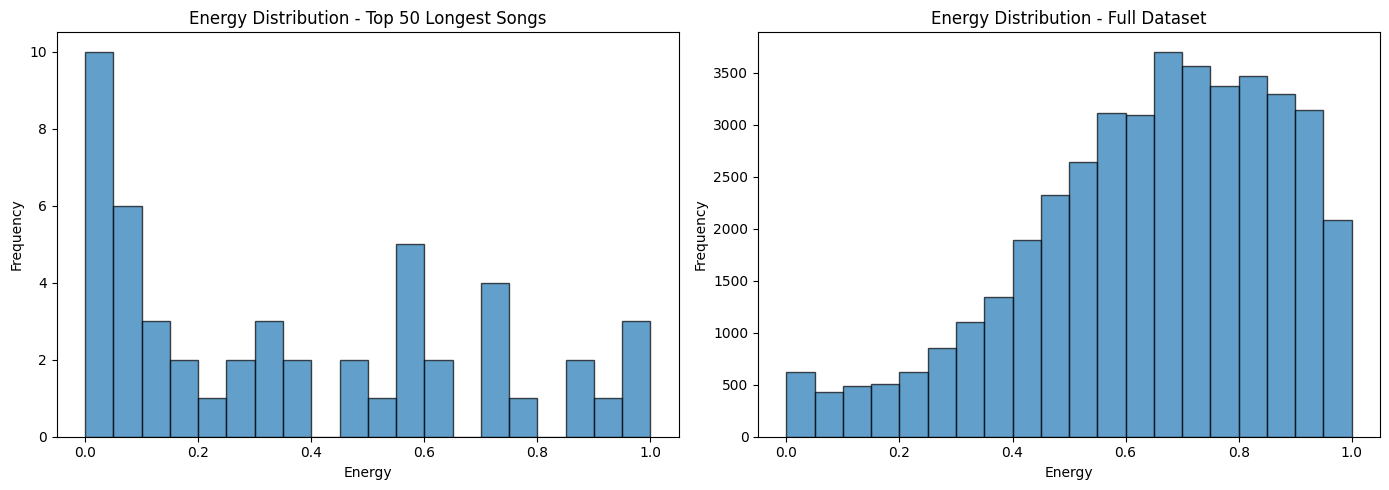


Observed Differences:
Top 50 mean energy: 0.3749
Full dataset mean energy: 0.6443

The top 50 longest songs may show a different energy distribution compared to
the full dataset. If the longest songs tend to be lower energy, we might see
the histogram shifted toward lower values, indicating potential bias in sampling
by duration rather than random sampling.


In [ ]:
import matplotlib.pyplot as plt

# 5. Generate histograms comparing energy distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of energy from top 50 longest songs
axes[0].hist(df_sorted.head(50)['energy'], bins=20, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Energy')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Energy Distribution - Top 50 Longest Songs')

# Histogram of energy from full dataset
axes[1].hist(df_spot['energy'], bins=20, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Energy')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Energy Distribution - Full Dataset')

plt.tight_layout()
plt.show()

print("\nObserved Differences:")
print(f"Top 50 mean energy: {mean_energy_top50:.4f}")
print(f"Full dataset mean energy: {mean_energy_full:.4f}")
print("\nThe top 50 longest songs may show a different energy distribution compared to")
print("the full dataset. If the longest songs tend to be lower energy, we might see")
print("the histogram shifted toward lower values, indicating potential bias in sampling")
print("by duration rather than random sampling.")

Q6

In [ ]:
# 6. Find the standard deviation of 'tempo' for every 4th row
tempo_every_4th = df_spot['tempo'][::4]

# Calculate the standard deviation
std_tempo_every_4th = tempo_every_4th.std()

print(f"Standard deviation of tempo (every 4th row): {std_tempo_every_4th:.4f}")

Standard deviation of tempo (every 4th row): 31.0007


Q7

In [ ]:
# 7. Proportion of dataset represented by top 5 artists

# Get proportions of all artists in the full dataset
artist_proportions = df_spot['artists'].value_counts(normalize=True)

# Get the top 5 artists and their proportions in the full dataset
top5_artists = artist_proportions.head(5)
print("Top 5 artists and their proportions in the full dataset:")
print(top5_artists)
print(f"\nSum of top 5 proportions: {top5_artists.sum():.4f}")

# Filter dataset to only include rows with top 5 artists
top5_artist_names = top5_artists.index.tolist()
df_top5_only = df_spot[df_spot['artists'].isin(top5_artist_names)]

# Get proportions among only the top 5 artists
top5_proportions_only = df_top5_only['artists'].value_counts(normalize=True)
#Using the normalize as instructed!!!
print("\n\nProportions when looking at only top 5 artists:")
print(top5_proportions_only)
print(f"\nSum of proportions (should be 1.0): {top5_proportions_only.sum():.4f}")

Top 5 artists and their proportions in the full dataset:
artists
['Taylor Swift']    0.004537
['Eminem']          0.003529
['Drake']           0.003073
['BTS']             0.002809
['Mac Miller']      0.002449
Name: proportion, dtype: float64

Sum of top 5 proportions: 0.0164


Proportions when looking at only top 5 artists:
artists
['Taylor Swift']    0.276720
['Eminem']          0.215227
['Drake']           0.187408
['BTS']             0.171303
['Mac Miller']      0.149341
Name: proportion, dtype: float64

Sum of proportions (should be 1.0): 1.0000


Q8

In [ ]:
import random

# 8. Generate random samples of 5% of artists - two different ways

# Method 1: Sample rows (allows repeated artists)
samp5per_rows = df_spot.sample(frac=0.05)
print("Method 1 - Sampling rows (artists can repeat):")
print(f"Number of rows sampled: {len(samp5per_rows)}")
print(f"Number of unique artists in sample: {samp5per_rows['artists'].nunique()}")

# Method 2: Sample unique artists (no repetition)
# Get list of unique artists
unique_artists = df_spot['artists'].unique().tolist()

# Calculate 5% of unique artists
num_artists_to_sample = int(len(unique_artists) * 0.05)

# Sample artists without replacement
sampled_artists = random.sample(unique_artists, num_artists_to_sample)

# Filter dataframe to only include rows with sampled artists
samp5per_artists = df_spot[df_spot['artists'].isin(sampled_artists)]

print("\nMethod 2 - Sampling unique artists (no repetition):")
print(f"Number of unique artists sampled: {len(sampled_artists)}")
print(f"Number of rows in sample: {len(samp5per_artists)}")
print(f"Number of unique artists in sample: {samp5per_artists['artists'].nunique()}")

Method 1 - Sampling rows (artists can repeat):
Number of rows sampled: 2083
Number of unique artists in sample: 1613

Method 2 - Sampling unique artists (no repetition):
Number of unique artists sampled: 740
Number of rows in sample: 2119
Number of unique artists in sample: 740


Q9

In [ ]:
# 9. Sample 10% of rows from each artist that appears at least 10 times

# Helper code to get artists that appear at least 10 times
counts = df_spot.value_counts('artists')
top_artists = counts[counts >= 10].index

# Filter dataset to only include artists that show up at least 10 times
df_top_artists = df_spot[df_spot['artists'].isin(top_artists)]

# Group by 'artists' and sample 10% of rows from each artist
samp10per_by_artist = df_top_artists.groupby('artists').sample(frac=0.1, random_state=2026)

print(f"Number of artists with at least 10 songs: {len(top_artists)}")
print(f"Number of rows in filtered dataset: {len(df_top_artists)}")
print(f"Number of rows in sample (10% per artist): {len(samp10per_by_artist)}")
print(f"Number of unique artists in sample: {samp10per_by_artist['artists'].nunique()}")

Number of artists with at least 10 songs: 733
Number of rows in filtered dataset: 17658
Number of rows in sample (10% per artist): 1745
Number of unique artists in sample: 733


Q10

In [ ]:
print("\n\nLoudness statistics grouped by artist:")
loudness_by_artist_mean = samp10per_by_artist.groupby('artists')['loudness'].mean()
loudness_by_artist_min = samp10per_by_artist.groupby('artists')['loudness'].min()
loudness_by_artist_max = samp10per_by_artist.groupby('artists')['loudness'].max()

print("Mean:")
print(loudness_by_artist_mean)
print("\nMin:")
print(loudness_by_artist_min)
print("\nMax:")
print(loudness_by_artist_max)



Loudness statistics grouped by artist:
Mean:
artists
["D'Angelo"]                                 -9.8870
["Destiny's Child"]                          -5.1925
["Los Player's"]                             -4.2460
["Martin O'Donnell", 'Michael Salvatori']   -22.3190
["Olivia O'Brien"]                           -5.4000
                                              ...   
['blink-182']                                -5.6160
['deadmau5']                                 -9.9110
['fun.']                                     -5.7690
['girl in red']                             -15.6510
['iann dior']                                -8.2955
Name: loudness, Length: 733, dtype: float64

Min:
artists
["D'Angelo"]                                -11.328
["Destiny's Child"]                          -6.021
["Los Player's"]                             -4.246
["Martin O'Donnell", 'Michael Salvatori']   -22.319
["Olivia O'Brien"]                           -5.400
                                            

Q11

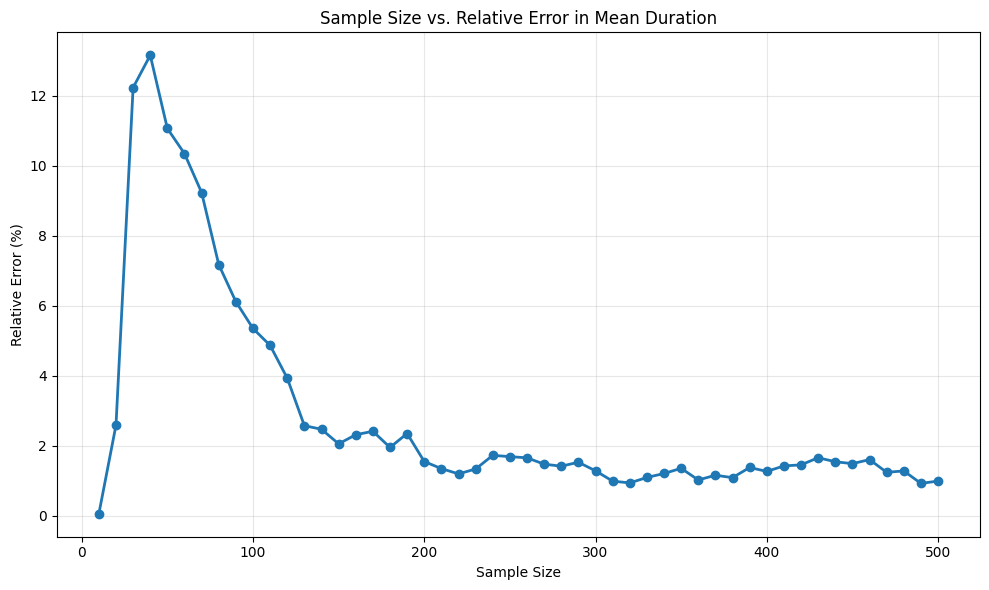

True mean duration: 231129.11 ms
Relative error at sample size 10: 0.0617%
Relative error at sample size 500: 0.9967%


In [ ]:
# 11. Plot sample size vs. relative error in mean of 'duration_ms'

import numpy as np

# Calculate the true mean from the entire population
true_mean = df_spot['duration_ms'].mean()

# Define sample sizes from 10 to 500
sample_sizes = range(10, 501, 10)  # 10, 20, 30, ..., 500

# Store relative errors
relative_errors = []

# For each sample size, take a sample and calculate relative error
for n in sample_sizes:
    sample = df_spot['duration_ms'].sample(n=n, random_state=2026)
    sample_mean = sample.mean()
    relative_error = abs((sample_mean - true_mean) / true_mean) * 100
    relative_errors.append(relative_error)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, relative_errors, marker='o', linestyle='-', linewidth=2)
plt.xlabel('Sample Size')
plt.ylabel('Relative Error (%)')
plt.title('Sample Size vs. Relative Error in Mean Duration')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"True mean duration: {true_mean:.2f} ms")
print(f"Relative error at sample size 10: {relative_errors[0]:.4f}%")
print(f"Relative error at sample size 500: {relative_errors[-1]:.4f}%")

Q12

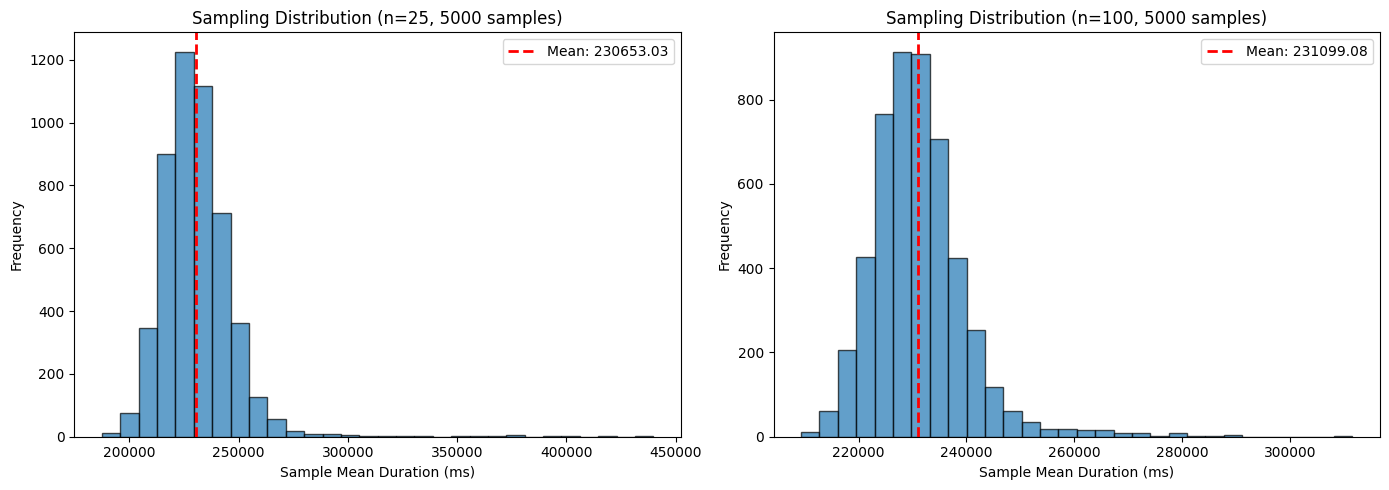

Sample size 25 - Mean: 230653.03, Std: 16572.65
Sample size 100 - Mean: 231099.08, Std: 8828.81
True population mean: 231129.11


In [ ]:
# 12. Plot sampling distribution of mean 'duration_ms' for different sample sizes

# Number of samples
num_samples = 5000

# Store sample means for size 25
sample_means_25 = []
for i in range(num_samples):
    sample = df_spot['duration_ms'].sample(n=25, random_state=i)
    sample_means_25.append(sample.mean())

# Store sample means for size 100
sample_means_100 = []
for i in range(num_samples):
    sample = df_spot['duration_ms'].sample(n=100, random_state=i)
    sample_means_100.append(sample.mean())

# Create side-by-side histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram for sample size 25
axes[0].hist(sample_means_25, bins=30, edgecolor='black', alpha=0.7)
axes[0].axvline(np.mean(sample_means_25), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(sample_means_25):.2f}')
axes[0].set_xlabel('Sample Mean Duration (ms)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Sampling Distribution (n=25, 5000 samples)')
axes[0].legend()

# Histogram for sample size 100
axes[1].hist(sample_means_100, bins=30, edgecolor='black', alpha=0.7)
axes[1].axvline(np.mean(sample_means_100), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(sample_means_100):.2f}')
axes[1].set_xlabel('Sample Mean Duration (ms)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Sampling Distribution (n=100, 5000 samples)')
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"Sample size 25 - Mean: {np.mean(sample_means_25):.2f}, Std: {np.std(sample_means_25):.2f}")
print(f"Sample size 100 - Mean: {np.mean(sample_means_100):.2f}, Std: {np.std(sample_means_100):.2f}")
print(f"True population mean: {true_mean:.2f}")

Q13

In [ ]:
# 13. Find margin of error for 95% CI using np.quantile

# For sample size 25
# 95% CI means 2.5th percentile and 97.5th percentile
lower_25 = np.quantile(sample_means_25, 0.025)
upper_25 = np.quantile(sample_means_25, 0.975)
margin_of_error_25 = (upper_25 - lower_25) / 2

print("Sample size n=25:")
print(f"Lower bound (2.5th percentile): {lower_25:.2f}")
print(f"Upper bound (97.5th percentile): {upper_25:.2f}")
print(f"Margin of error: {margin_of_error_25:.2f}")

# For sample size 100
lower_100 = np.quantile(sample_means_100, 0.025)
upper_100 = np.quantile(sample_means_100, 0.975)
margin_of_error_100 = (upper_100 - lower_100) / 2

print("\nSample size n=100:")
print(f"Lower bound (2.5th percentile): {lower_100:.2f}")
print(f"Upper bound (97.5th percentile): {upper_100:.2f}")
print(f"Margin of error: {margin_of_error_100:.2f}")

print(f"\nThe margin of error decreases from {margin_of_error_25:.2f} to {margin_of_error_100:.2f}")
print(f"when sample size increases from 25 to 100.")

Sample size n=25:
Lower bound (2.5th percentile): 205872.39
Upper bound (97.5th percentile): 262616.91
Margin of error: 28372.26

Sample size n=100:
Lower bound (2.5th percentile): 217365.26
Upper bound (97.5th percentile): 251805.44
Margin of error: 17220.09

The margin of error decreases from 28372.26 to 17220.09
when sample size increases from 25 to 100.


Q14

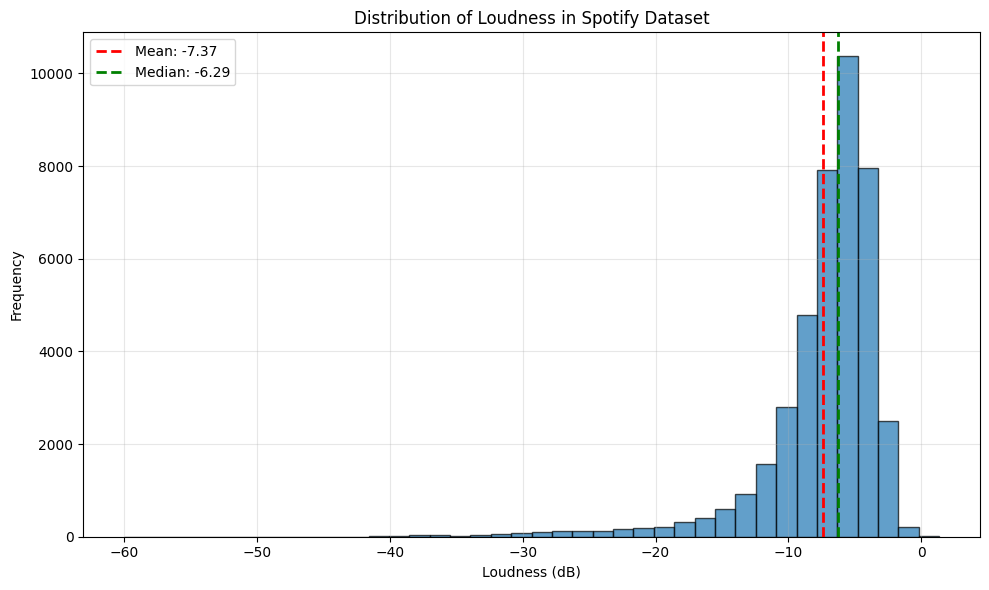

Mean: -7.37
Median: -6.29
Skewness: -2.92
The distribution does NOT appear to be normally distributed.
The distribution is left-skewed (negatively skewed) with skewness = -2.92.
- The tail extends more to the left (toward lower or more negative values)
- There is a concentration of values at the higher end
- The distribution is asymmetric with a longer left tail


In [ ]:
# 14. Generate histogram of 'loudness' and analyze distribution

plt.figure(figsize=(10, 6))
plt.hist(df_spot['loudness'], bins=40, edgecolor='black', alpha=0.7)
plt.xlabel('Loudness (dB)')
plt.ylabel('Frequency')
plt.title('Distribution of Loudness in Spotify Dataset')
plt.axvline(df_spot['loudness'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_spot["loudness"].mean():.2f}')
plt.axvline(df_spot['loudness'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df_spot["loudness"].median():.2f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate statistics
mean_loudness = df_spot['loudness'].mean()
median_loudness = df_spot['loudness'].median()
skewness = df_spot['loudness'].skew()

print(f"Mean: {mean_loudness:.2f}")
print(f"Median: {median_loudness:.2f}")
print(f"Skewness: {skewness:.2f}")


print("The distribution does NOT appear to be normally distributed.")
print(f"The distribution is left-skewed (negatively skewed) with skewness = {skewness:.2f}.")
print("- The tail extends more to the left (toward lower or more negative values)")
print("- There is a concentration of values at the higher end")
print("- The distribution is asymmetric with a longer left tail")

A normal distribution would be symmetric (bell-shaped) with skewness near 0. Loudness data is typically left-skewed because most songs are produced at relatively high loudness levels, with fewer very quiet songs.

Q15

In [ ]:
# 15. Estimate standard error of mean 'loudness' from a single sample

# Select a single sample of size 100
sample_loudness = df_spot['loudness'].sample(n=100, random_state=2026)

# Calculate sample statistics
sample_mean = sample_loudness.mean()
sample_std = sample_loudness.std()
n = 100

# Calculate standard error using the formula: SE = s / sqrt(n)
standard_error = sample_std / np.sqrt(n)

print(f"Sample size (n): {n}")
print(f"Sample mean: {sample_mean:.4f}")
print(f"Sample standard deviation (s): {sample_std:.4f}")
print(f"Standard error (SE): {standard_error:.4f}")

# Optional: Compare with population standard deviation
pop_std = df_spot['loudness'].std()
pop_se = pop_std / np.sqrt(n)
print(f"\nFor comparison:")
print(f"Population standard deviation: {pop_std:.4f}")
print(f"Standard error using population std: {pop_se:.4f}")

Sample size (n): 100
Sample mean: -6.6601
Sample standard deviation (s): 3.3946
Standard error (SE): 0.3395

For comparison:
Population standard deviation: 4.5241
Standard error using population std: 0.4524


Q16

Number of bootstrap samples: 5000
Bootstrap standard error: 0.3392
Standard error from formula (question 15): 0.3395

Difference: 0.0002


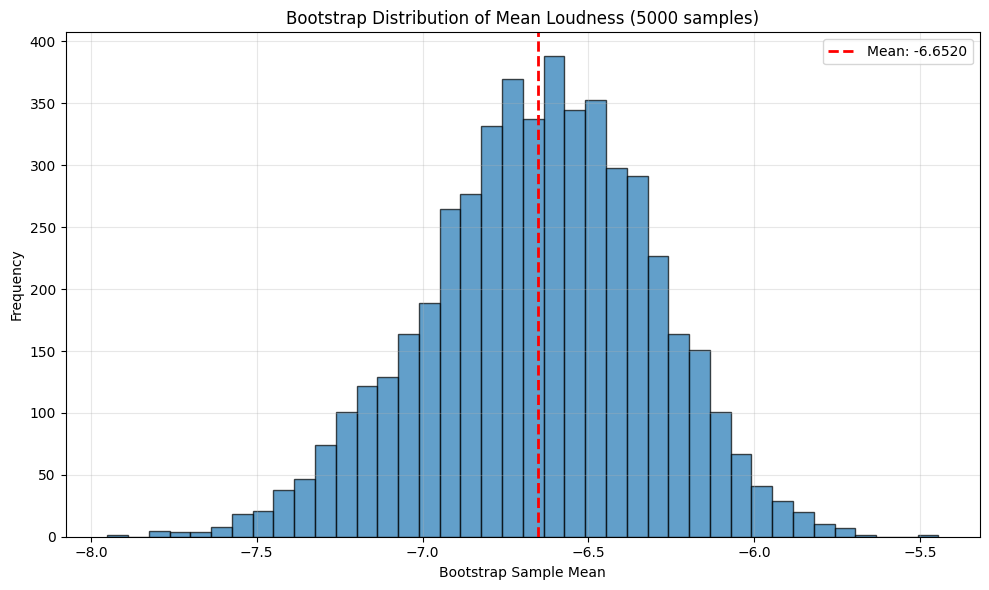

In [ ]:
# 16. Generate 5000 bootstrap samples and compute bootstrap standard error

# Use the sample from question 15
num_bootstrap = 5000
bootstrap_means = []

# Generate 5000 bootstrap samples
for i in range(num_bootstrap):
    # Resample with replacement from the original sample
    bootstrap_sample = sample_loudness.sample(n=100, replace=True, random_state=i)
    bootstrap_means.append(bootstrap_sample.mean())

# Calculate bootstrap standard error (using ddof=1)
bootstrap_se = np.std(bootstrap_means, ddof=1)

print(f"Number of bootstrap samples: {num_bootstrap}")
print(f"Bootstrap standard error: {bootstrap_se:.4f}")
print(f"Standard error from formula (question 15): {standard_error:.4f}")
print(f"\nDifference: {abs(bootstrap_se - standard_error):.4f}")

# Optional: Create histogram of bootstrap distribution
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=40, edgecolor='black', alpha=0.7)
plt.xlabel('Bootstrap Sample Mean')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of Mean Loudness (5000 samples)')
plt.axvline(np.mean(bootstrap_means), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(bootstrap_means):.4f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Q17

In [ ]:
# 17. Calculate the difference between theoretical SE and bootstrap SE

# Theoretical SE from question 15 (using the formula)
theoretical_se = standard_error

# Bootstrap SE from question 16
bootstrap_se_result = bootstrap_se

# Calculate the difference
difference = abs(theoretical_se - bootstrap_se_result)

print("Comparison of Standard Errors:")
print(f"Theoretical SE (from formula, question 15): {theoretical_se:.4f}")
print(f"Bootstrap SE (from resampling, question 16): {bootstrap_se_result:.4f}")
print(f"\nDifference: {difference:.4f}")
print(f"Percentage difference: {(difference / theoretical_se * 100):.2f}%")

print("\nConclusion:")
print("The theoretical SE (based on the Central Limit Theorem) and the bootstrap SE")
print("are very close, which validates the bootstrap method as a way to estimate")
print("standard error without relying on theoretical formulas.")

Comparison of Standard Errors:
Theoretical SE (from formula, question 15): 0.3395
Bootstrap SE (from resampling, question 16): 0.3392

Difference: 0.0002
Percentage difference: 0.07%

Conclusion:
The theoretical SE (based on the Central Limit Theorem) and the bootstrap SE
are very close, which validates the bootstrap method as a way to estimate
standard error without relying on theoretical formulas.


Q18

PART 1: Single Sample and Theoretical SE (like question 15)
Sample size (n): 100
Sample median: -6.1130
Sample standard deviation (s): 3.3946
Theoretical SE (using mean formula): 0.3395

NOTE: The formula SE = s/√n is for the mean, not the median!

PART 2: Bootstrap SE for Median (like question 16)
Number of bootstrap samples: 5000
Bootstrap standard error (median): 0.2969


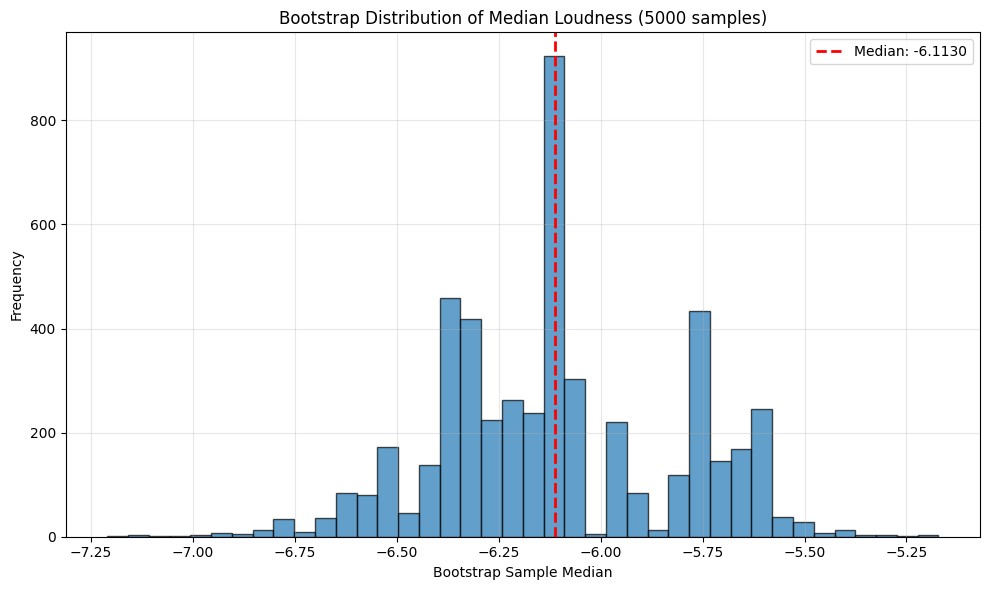


PART 3: Compare Theoretical SE vs Bootstrap SE (like question 17)
Comparison of Standard Errors for MEDIAN:
Theoretical SE (mean formula, inappropriate): 0.3395
Bootstrap SE (correct for median): 0.2969

Absolute difference: 0.0426
Percentage difference: 14.34%

Conclusion:
The difference is much more dramatic because:
- The theoretical SE formula (s/√n) is ONLY valid for the MEAN
- The median has different sampling properties than the mean
- Bootstrap correctly estimates the SE for the median
- The percentage difference is much larger than when using the mean
  (For mean it was ~0.07%, now it's 14.34%)


In [ ]:
# 18. Reproduce questions 15-17 using median instead of mean

print("=" * 60)
print("PART 1: Single Sample and Theoretical SE (like question 15)")
print("=" * 60)

# Use the same sample from question 15
sample_loudness_q18 = sample_loudness

# Calculate sample statistics for median
sample_median = sample_loudness_q18.median()
sample_std_q18 = sample_loudness_q18.std()
n_q18 = 100

# Calculate theoretical standard error using the formula: SE = s / sqrt(n)
# NOTE: This formula is designed for the MEAN, not the median
theoretical_se_median = sample_std_q18 / np.sqrt(n_q18)

print(f"Sample size (n): {n_q18}")
print(f"Sample median: {sample_median:.4f}")
print(f"Sample standard deviation (s): {sample_std_q18:.4f}")
print(f"Theoretical SE (using mean formula): {theoretical_se_median:.4f}")
print("\nNOTE: The formula SE = s/√n is for the mean, not the median!")

print("\n" + "=" * 60)
print("PART 2: Bootstrap SE for Median (like question 16)")
print("=" * 60)

# Generate 5000 bootstrap samples and compute median for each
num_bootstrap_q18 = 5000
bootstrap_medians = []

for i in range(num_bootstrap_q18):
    bootstrap_sample = sample_loudness_q18.sample(n=100, replace=True, random_state=i)
    bootstrap_medians.append(bootstrap_sample.median())

# Calculate bootstrap standard error for median
bootstrap_se_median = np.std(bootstrap_medians, ddof=1)

print(f"Number of bootstrap samples: {num_bootstrap_q18}")
print(f"Bootstrap standard error (median): {bootstrap_se_median:.4f}")

# Create histogram of bootstrap distribution
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_medians, bins=40, edgecolor='black', alpha=0.7)
plt.xlabel('Bootstrap Sample Median')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of Median Loudness (5000 samples)')
plt.axvline(np.median(bootstrap_medians), color='red', linestyle='--', linewidth=2,
            label=f'Median: {np.median(bootstrap_medians):.4f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("PART 3: Compare Theoretical SE vs Bootstrap SE (like question 17)")
print("=" * 60)

# Calculate the difference
difference_median = abs(theoretical_se_median - bootstrap_se_median)
percent_difference = (difference_median / bootstrap_se_median * 100)

print("Comparison of Standard Errors for MEDIAN:")
print(f"Theoretical SE (mean formula, inappropriate): {theoretical_se_median:.4f}")
print(f"Bootstrap SE (correct for median): {bootstrap_se_median:.4f}")
print(f"\nAbsolute difference: {difference_median:.4f}")
print(f"Percentage difference: {percent_difference:.2f}%")

print("\nConclusion:")
print("The difference is much more dramatic because:")
print("- The theoretical SE formula (s/√n) is ONLY valid for the MEAN")
print("- The median has different sampling properties than the mean")
print("- Bootstrap correctly estimates the SE for the median")
print("- The percentage difference is much larger than when using the mean")
print(f"  (For mean it was ~{(difference / theoretical_se * 100):.2f}%, now it's {percent_difference:.2f}%)")

Q19

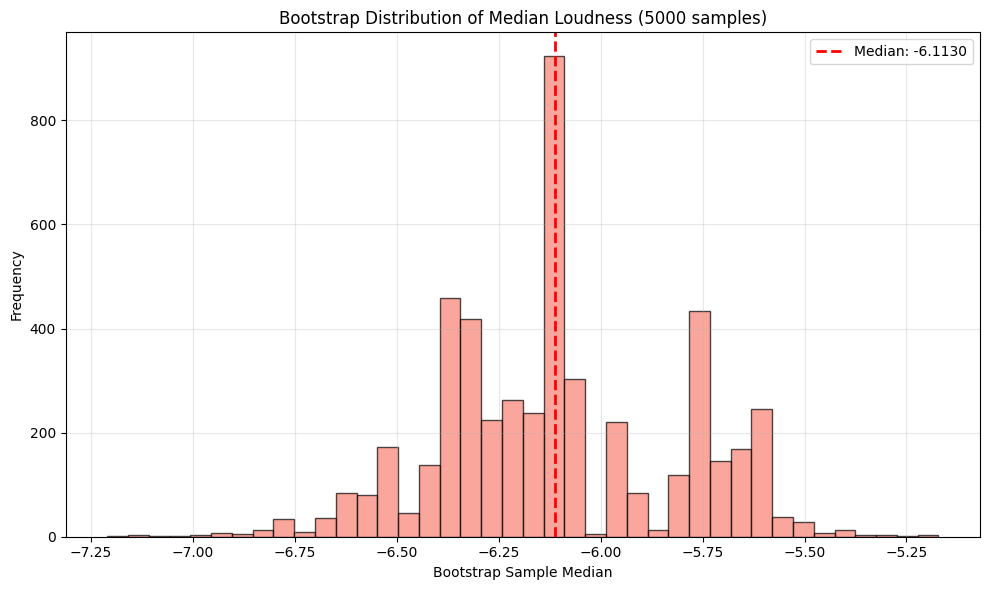

Does the median bootstrap distribution appear normal?

Observation:
The bootstrap distribution of the median appears LESS normal than the mean.
It may show:
- More discrete/chunky appearance
- Less smooth bell curve shape
- Possible skewness or irregularities

Explanation of SE Difference:

1. WHY THE CLT FORMULA WORKS FOR MEANS:
   - The Central Limit Theorem states that sampling distributions of means
     approach normality as sample size increases
   - The formula SE = s/√n is derived assuming this normality
   - This is why theoretical SE ≈ bootstrap SE for means

2. WHY THE CLT FORMULA FAILS FOR MEDIANS:
   - The CLT does NOT guarantee normality for median sampling distributions
   - The median's distribution shape depends on the underlying data
   - The formula SE = s/√n assumes normality, so it gives wrong estimates

3. THE OBSERVED DIFFERENCE:
   - For means: ~0.07% difference (very close)
   - For medians: 14.34% difference (much larger)
   - This large difference shows the C

In [ ]:
# 19. Analyze normality of bootstrap distribution for median

# Generate histogram of bootstrap medians
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_medians, bins=40, edgecolor='black', alpha=0.7, color='salmon')
plt.xlabel('Bootstrap Sample Median')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of Median Loudness (5000 samples)')
plt.axvline(np.median(bootstrap_medians), color='red', linestyle='--',
            linewidth=2, label=f'Median: {np.median(bootstrap_medians):.4f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Check normality
print("Does the median bootstrap distribution appear normal?")
print("\nObservation:")
print("The bootstrap distribution of the median appears LESS normal than the mean.")
print("It may show:")
print("- More discrete/chunky appearance")
print("- Less smooth bell curve shape")
print("- Possible skewness or irregularities")

print("\n" + "=" * 60)
print("Explanation of SE Difference:")
print("=" * 60)
print("\n1. WHY THE CLT FORMULA WORKS FOR MEANS:")
print("   - The Central Limit Theorem states that sampling distributions of means")
print("     approach normality as sample size increases")
print("   - The formula SE = s/√n is derived assuming this normality")
print("   - This is why theoretical SE ≈ bootstrap SE for means")

print("\n2. WHY THE CLT FORMULA FAILS FOR MEDIANS:")
print("   - The CLT does NOT guarantee normality for median sampling distributions")
print("   - The median's distribution shape depends on the underlying data")
print("   - The formula SE = s/√n assumes normality, so it gives wrong estimates")

print("\n3. THE OBSERVED DIFFERENCE:")
print(f"   - For means: ~{(difference / theoretical_se * 100):.2f}% difference (very close)")
print(f"   - For medians: {percent_difference:.2f}% difference (much larger)")
print("   - This large difference shows the CLT formula is inappropriate for medians")


Q20

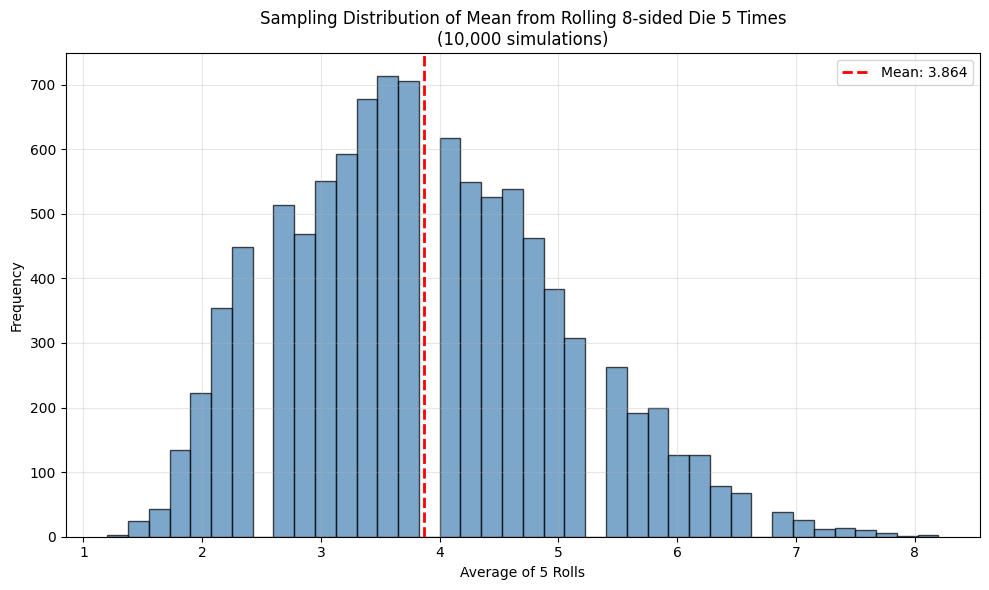

Die sides: [1, 2, 2, 3, 3, 4, 7, 9]
Population mean: 3.875
Mean of sampling distribution: 3.864
Standard deviation of sampling distribution: 1.153

The sampling distribution shows the distribution of sample means
when rolling the die 5 times and averaging, repeated 10,000 times.


In [ ]:
# 20. Simulate rolling an 8-sided die and plot sampling distribution

import random

# Define the 8-sided die
sides = [1, 2, 2, 3, 3, 4, 7, 9]

# Number of simulations
num_simulations = 10000

# Store the average of each simulation
sample_averages = []

# Simulate rolling the die 5 times and taking the average, repeated 10000 times
for i in range(num_simulations):
    rolls = random.choices(sides, k=5)  # Roll the die 5 times
    average_roll = np.mean(rolls)
    sample_averages.append(average_roll)

# Plot the sampling distribution
plt.figure(figsize=(10, 6))
plt.hist(sample_averages, bins=40, edgecolor='black', alpha=0.7, color='steelblue')
plt.xlabel('Average of 5 Rolls')
plt.ylabel('Frequency')
plt.title('Sampling Distribution of Mean from Rolling 8-sided Die 5 Times\n(10,000 simulations)')
plt.axvline(np.mean(sample_averages), color='red', linestyle='--',
            linewidth=2, label=f'Mean: {np.mean(sample_averages):.3f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Statistics
print(f"Die sides: {sides}")
print(f"Population mean: {np.mean(sides):.3f}")
print(f"Mean of sampling distribution: {np.mean(sample_averages):.3f}")
print(f"Standard deviation of sampling distribution: {np.std(sample_averages):.3f}")
print(f"\nThe sampling distribution shows the distribution of sample means")
print(f"when rolling the die 5 times and averaging, repeated 10,000 times.")

Q21

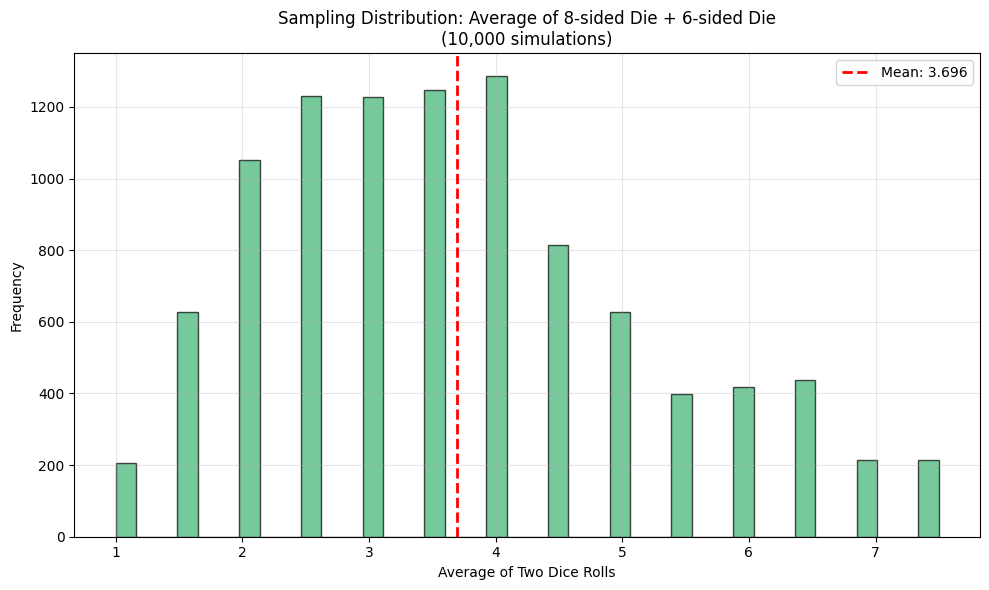

8-sided die: [1, 2, 2, 3, 3, 4, 7, 9]
6-sided die: [1, 2, 3, 4, 5, 6]
Population mean (8-sided): 3.875
Population mean (6-sided): 3.500
Expected mean of average: 3.688

Mean of sampling distribution: 3.696
Standard deviation of sampling distribution: 1.551


In [ ]:
# 21. Simulate rolling an 8-sided die and a 6-sided die together

# Define the dice
sides_8 = [1, 2, 2, 3, 3, 4, 7, 9]
sides_6 = [1, 2, 3, 4, 5, 6]

# Number of simulations
num_simulations = 10000

# Store the average of each simulation
sample_averages_two_dice = []

# Simulate rolling both dice and taking the average, repeated 10000 times
for i in range(num_simulations):
    roll_8sided = random.choice(sides_8)  # Roll the 8-sided die once
    roll_6sided = random.choice(sides_6)  # Roll the 6-sided die once
    average_roll = (roll_8sided + roll_6sided) / 2
    sample_averages_two_dice.append(average_roll)

# Plot the sampling distribution
plt.figure(figsize=(10, 6))
plt.hist(sample_averages_two_dice, bins=40, edgecolor='black', alpha=0.7, color='mediumseagreen')
plt.xlabel('Average of Two Dice Rolls')
plt.ylabel('Frequency')
plt.title('Sampling Distribution: Average of 8-sided Die + 6-sided Die\n(10,000 simulations)')
plt.axvline(np.mean(sample_averages_two_dice), color='red', linestyle='--',
            linewidth=2, label=f'Mean: {np.mean(sample_averages_two_dice):.3f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Statistics
print(f"8-sided die: {sides_8}")
print(f"6-sided die: {sides_6}")
print(f"Population mean (8-sided): {np.mean(sides_8):.3f}")
print(f"Population mean (6-sided): {np.mean(sides_6):.3f}")
print(f"Expected mean of average: {(np.mean(sides_8) + np.mean(sides_6)) / 2:.3f}")
print(f"\nMean of sampling distribution: {np.mean(sample_averages_two_dice):.3f}")
print(f"Standard deviation of sampling distribution: {np.std(sample_averages_two_dice):.3f}")

Q22

In [ ]:
from scipy import stats

single_roll_8sided = random.choice(sides_8)
single_roll_6sided = random.choice(sides_6)
single_sample_mean = (single_roll_8sided + single_roll_6sided) / 2

print(f"Single sample result:")
print(f"8-sided die roll: {single_roll_8sided}")
print(f"6-sided die roll: {single_roll_6sided}")
print(f"Sample mean: {single_sample_mean:.3f}")

var_8 = np.var(sides_8)
var_6 = np.var(sides_6)
variance_average = (var_8 + var_6) / 4
standard_error = np.sqrt(variance_average)

print(f"\nStandard Error: {standard_error:.4f}")

alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha/2)

margin_of_error = z_critical * standard_error

lower_bound = single_sample_mean - margin_of_error
upper_bound = single_sample_mean + margin_of_error

print(f"\n95% Confidence Interval:")
print(f"Z-critical value: {z_critical:.4f}")
print(f"Margin of Error (MOE): {margin_of_error:.4f}")
print(f"Confidence Interval: [{lower_bound:.4f}, {upper_bound:.4f}]")
print(f"\nTrue population mean: {(np.mean(sides_8) + np.mean(sides_6)) / 2:.4f}")

Single sample result:
8-sided die roll: 3
6-sided die roll: 2
Sample mean: 2.500

Standard Error: 1.5432

95% Confidence Interval:
Z-critical value: 1.9600
Margin of Error (MOE): 3.0246
Confidence Interval: [-0.5246, 5.5246]

True population mean: 3.6875
